<a href="https://colab.research.google.com/github/syaf136/draft/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPROCESSING  

Step 1: Import libraries

In [ ]:
!pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 17.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from math import radians, sin, cos, sqrt, atan2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

Step 2: Load The Dataset.

In [ ]:
data_path = 'fraudTrain.csv'   # 👈 make sure this matches your uploaded filename
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Step 3: Understand our dataset.

In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Data Preprocessing

In [ ]:
df = df.drop(columns=['first', 'last', 'street', 'trans_num', 'cc_num']
)
df.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Saturday/Sunday = 1

df.drop('trans_date_trans_time', axis=1, inplace=True)

df.head()
#convert trans_date_trans_time column into datetime format.

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend
0,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,1,0
1,1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,1,0
2,2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,1,0
3,3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,0
4,4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df.head()
#encode the Merchant Category column using Label Encoding.

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend
0,0,514,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,1,0
1,1,241,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,1,0
2,2,390,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,1,0
3,3,360,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,0
4,4,297,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,1,0


In [ ]:
df['merchant'].value_counts()

,count
merchant,
316,4403
105,3649
571,3634
349,3510
70,3493
...,...
143,775
633,775
423,759


In [ ]:
df['merchant_category_combo'] = df['merchant'].astype(str) + '_' + df['category'].astype(str)
#combo of the merchent and category column.

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

df['distance_km'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
df.head()
#calculates the distance (in kilometers) between the customer’s location and the merchant’s location
#using the Haversine formula and adds it as a new column called distance_km in the dataset.

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km
0,0,514,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,-82.048315,0,2019,1,1,0,1,0,514_misc_net,78.597568
1,1,241,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,-118.186462,0,2019,1,1,0,1,0,241_grocery_pos,30.212176
2,2,390,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,-112.154481,0,2019,1,1,0,1,0,390_entertainment,108.206083
3,3,360,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,-112.561071,0,2019,1,1,0,1,0,360_gas_transport,95.673231
4,4,297,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,-78.632459,0,2019,1,1,0,1,0,297_misc_pos,77.556744


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df.head()
#encode the category column using Label Encoding.

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_long,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km
0,0,514,8,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,-82.048315,0,2019,1,1,0,1,0,514_misc_net,78.597568
1,1,241,4,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,-118.186462,0,2019,1,1,0,1,0,241_grocery_pos,30.212176
2,2,390,0,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,-112.154481,0,2019,1,1,0,1,0,390_entertainment,108.206083
3,3,360,2,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,-112.561071,0,2019,1,1,0,1,0,360_gas_transport,95.673231
4,4,297,9,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,-78.632459,0,2019,1,1,0,1,0,297_misc_pos,77.556744


In [ ]:
df.groupby('is_fraud')['amt'].value_counts()

is_fraud  amt    
0         1.14       542
          1.04       538
          1.25       535
          1.02       533
          1.01       523
                    ... 
1         1313.18      1
          1324.80      1
          1334.07      1
          1371.81      1
          1376.04      1
Name: count, Length: 55706, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'day_of_week', 'is_weekend', 'merchant_category_combo', 'distance_km'],
      dtype='object')

In [ ]:
df.zip.info

<bound method Series.info of 0          28654
1          99160
2          83252
3          59632
4          24433
           ...  
1296670    84735
1296671    21790
1296672    88325
1296673    57756
1296674    59871
Name: zip, Length: 1296675, dtype: int64>

In [ ]:
zip_fraud_rate = df.groupby('zip')['is_fraud'].mean().reset_index()
zip_fraud_rate

,zip,is_fraud
0,1257,0.000000
1,1330,0.008729
2,1535,0.017476
3,1545,0.000000
4,1612,0.017341
...,...,...
965,99160,0.000000
966,99323,0.002722
967,99746,0.016667
968,99747,1.000000


In [ ]:
zip_fraud_rate = df.groupby('zip')['is_fraud'].mean().reset_index()
zip_fraud_rate.columns = ['zip', 'zip_fraud_rate']
df = df.merge(zip_fraud_rate, on='zip', how='left')

df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,is_fraud,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km,zip_fraud_rate
0,0,514,8,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,0,2019,1,1,0,1,0,514_misc_net,78.597568,0.000000
1,1,241,4,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,0,2019,1,1,0,1,0,241_grocery_pos,30.212176,0.000000
2,2,390,0,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,0,2019,1,1,0,1,0,390_entertainment,108.206083,0.000000
3,3,360,2,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,0,2019,1,1,0,1,0,360_gas_transport,95.673231,0.030426
4,4,297,9,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,0,2019,1,1,0,1,0,297_misc_pos,77.556744,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['zip_encoded'] = le.fit_transform(df['zip'])
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km,zip_fraud_rate,zip_encoded
0,0,514,8,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,...,2019,1,1,0,1,0,514_misc_net,78.597568,0.000000,265
1,1,241,4,107.23,F,Orient,WA,99160,48.8878,-118.2105,...,2019,1,1,0,1,0,241_grocery_pos,30.212176,0.000000,965
2,2,390,0,220.11,M,Malad City,ID,83252,42.1808,-112.2620,...,2019,1,1,0,1,0,390_entertainment,108.206083,0.000000,858
3,3,360,2,45.00,M,Boulder,MT,59632,46.2306,-112.1138,...,2019,1,1,0,1,0,360_gas_transport,95.673231,0.030426,614
4,4,297,9,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,...,2019,1,1,0,1,0,297_misc_pos,77.556744,0.000000,231


In [ ]:
df.drop(columns=['zip'], inplace=True)
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,lat,long,city_pop,...,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km,zip_fraud_rate,zip_encoded
0,0,514,8,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,2019,1,1,0,1,0,514_misc_net,78.597568,0.000000,265
1,1,241,4,107.23,F,Orient,WA,48.8878,-118.2105,149,...,2019,1,1,0,1,0,241_grocery_pos,30.212176,0.000000,965
2,2,390,0,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,2019,1,1,0,1,0,390_entertainment,108.206083,0.000000,858
3,3,360,2,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,2019,1,1,0,1,0,360_gas_transport,95.673231,0.030426,614
4,4,297,9,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,2019,1,1,0,1,0,297_misc_pos,77.556744,0.000000,231


<Axes: xlabel='amt', ylabel='Count'>

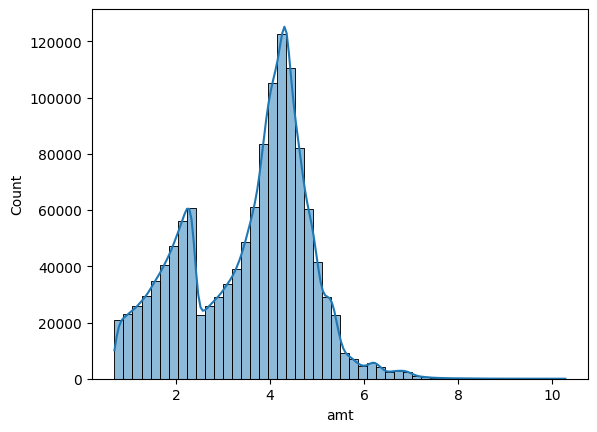

In [ ]:
import numpy as np

df['amt'] = np.log1p(df['amt'])  # log1p = log(x+1)
sns.histplot(df['amt'], kde=True, bins=50)

<Axes: xlabel='is_fraud', ylabel='count'>

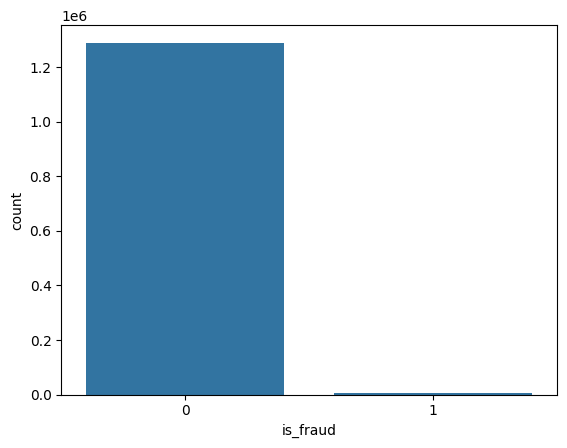

In [ ]:
sns.countplot(x='is_fraud', data=df)

In [ ]:
#encode all the categorical columns using Label Encoding.
df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.to_csv("preprocessed_data.csv", index=False)
print("Saved preprocessed_data.csv")

Saved preprocessed_data.csv


In [ ]:
#Divides Testing and training using stratify and applies SMOTE
# Step 1: Split X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Step 2: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 3: Handle imbalance using SMOTE.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.1)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE:", X_train_res.shape, y_train_res.value_counts().to_dict())


Before SMOTE: (1037340, 25) {0: 1031335, 1: 6005}
After SMOTE: (1134468, 25) {0: 1031335, 1: 103133}


In [ ]:
import pandas as pd

df_resampled = pd.concat(
    [pd.DataFrame(X_train_res, columns=X.columns),
     pd.Series(y_train_res, name='is_fraud')],
    axis=1
)

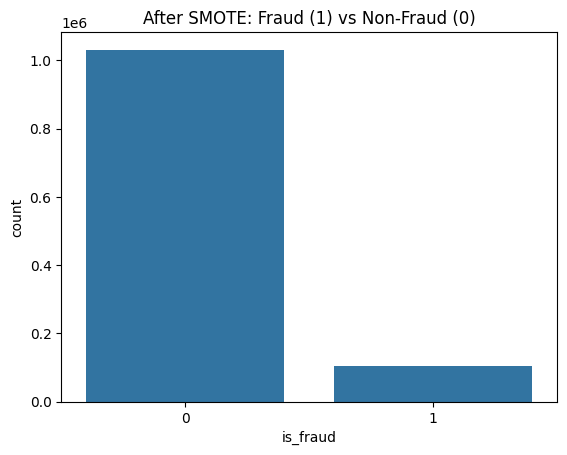

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=df_resampled)
plt.title("After SMOTE: Fraud (1) vs Non-Fraud (0)")
plt.show()

In [ ]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,lat,long,city_pop,...,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km,zip_fraud_rate,zip_encoded
0,0,514,8,1.786747,0,526,27,36.0788,-81.1781,3495,...,2019,1,1,0,1,0,465,78.597568,0.000000,265
1,1,241,4,4.684259,0,612,47,48.8878,-118.2105,149,...,2019,1,1,0,1,0,160,30.212176,0.000000,965
2,2,390,0,5.398660,1,468,13,42.1808,-112.2620,4154,...,2019,1,1,0,1,0,327,108.206083,0.000000,858
3,3,360,2,3.828641,1,84,26,46.2306,-112.1138,1939,...,2019,1,1,0,1,0,294,95.673231,0.030426,614
4,4,297,9,3.760269,1,216,45,38.4207,-79.4629,99,...,2019,1,1,0,1,0,221,77.556744,0.000000,231


In [ ]:
df['gender'].value_counts()

,count
gender,
0,709863
1,586812


In [ ]:
print(df['lat'].min(), df['lat'].max())
print(df['long'].min(), df['long'].max())

20.0271 66.6933
-165.6723 -67.9503


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['unix_time'] = scaler.fit_transform(df[['unix_time']])

<Axes: xlabel='unix_time', ylabel='Count'>

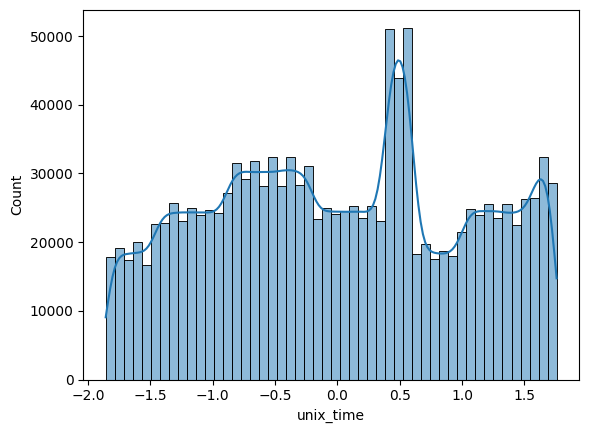

In [ ]:
sns.histplot(df['unix_time'], bins=50, kde=True)

In [ ]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,lat,long,city_pop,...,year,month,day,hour,day_of_week,is_weekend,merchant_category_combo,distance_km,zip_fraud_rate,zip_encoded
0,0,514,8,1.786747,0,526,27,36.0788,-81.1781,3495,...,2019,1,1,0,1,0,465,78.597568,0.000000,265
1,1,241,4,4.684259,0,612,47,48.8878,-118.2105,149,...,2019,1,1,0,1,0,160,30.212176,0.000000,965
2,2,390,0,5.398660,1,468,13,42.1808,-112.2620,4154,...,2019,1,1,0,1,0,327,108.206083,0.000000,858
3,3,360,2,3.828641,1,84,26,46.2306,-112.1138,1939,...,2019,1,1,0,1,0,294,95.673231,0.030426,614
4,4,297,9,3.760269,1,216,45,38.4207,-79.4629,99,...,2019,1,1,0,1,0,221,77.556744,0.000000,231


<Axes: xlabel='gender', ylabel='count'>

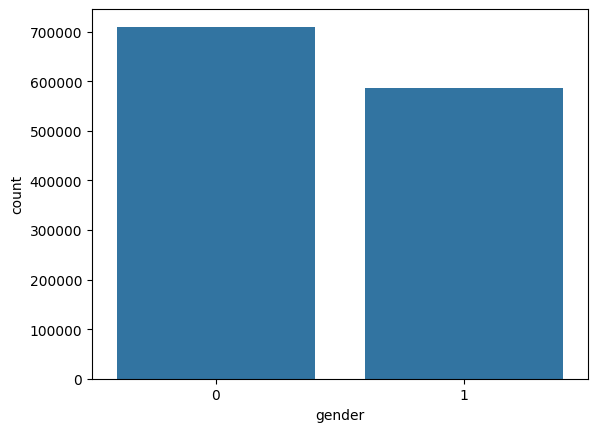

In [ ]:
sns.countplot(x='gender', data=df)

Step 5: Model Building and Evaluation

In [ ]:
import pandas as pd
import numpy as np



X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fast & Powerful Models Only

models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1, eval_metric='logloss'
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, learning_rate=0.1, num_leaves=31,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        n_jobs=-1
    ),
}

# Train + Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC_AUC": roc
    })

    print(f"\n================= {name} =================")
    print(f" Accuracy: {acc:.4f} |  ROC-AUC: {roc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


================= Logistic Regression =================
 Accuracy: 0.9947 |  ROC-AUC: 0.8677
Confusion Matrix:
 [[257755     79]
 [  1297    204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.72      0.14      0.23      1501

    accuracy                           0.99    259335
   macro avg       0.86      0.57      0.61    259335
weighted avg       0.99      0.99      0.99    259335


================= Random Forest =================
 Accuracy: 0.9981 |  ROC-AUC: 0.9944
Confusion Matrix:
 [[257818     16]
 [   464   1037]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.69      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.85      0.91    259335
weighted avg       1.00      1.00      1.00    259335


=======